In [1]:
import pandas as pd

# Load the dataset
file_path = 'netflix1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()



,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [2]:
# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [3]:

# Check for missing or null values
data.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [4]:
# Check for missing or null values
data.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
# Display summary statistics for numeric columns
data.describe()

# Display counts of unique values for categorical columns
data['type'].value_counts()


type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [6]:
# Convert 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], format='%m/%d/%Y')

# Split 'duration' into numeric values and units (minutes or seasons)
data[['duration_value', 'duration_unit']] = data['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert 'duration_value' to numeric
data['duration_value'] = pd.to_numeric(data['duration_value'])

# Preview the updated dataset
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90,min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91,min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125,min


C:\Users\admin\AppData\Local\Temp\ipykernel_6008\3386515893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='viridis')


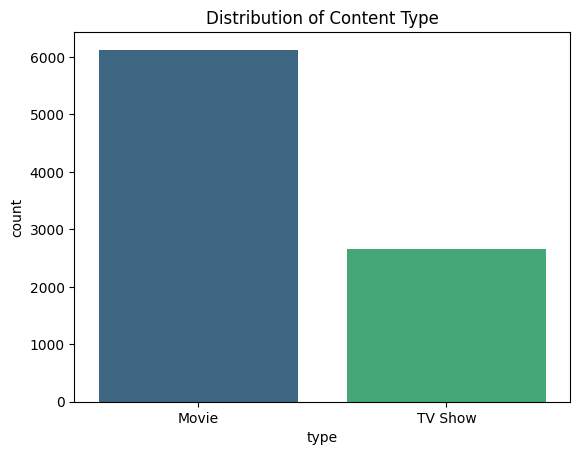

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
sns.countplot(data=data, x='type', palette='viridis')
plt.title('Distribution of Content Type')
plt.show()


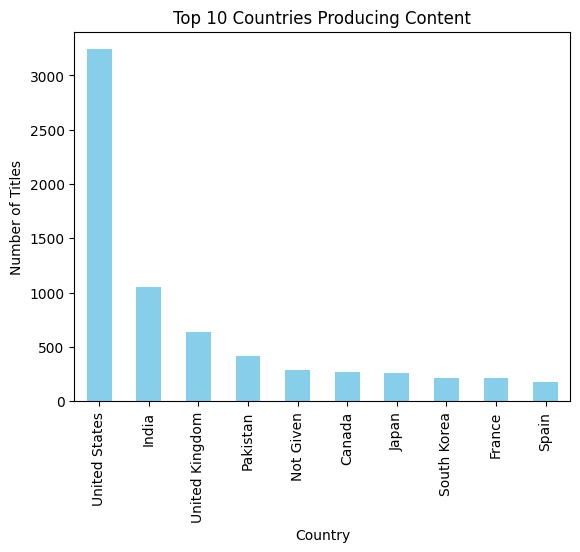

In [8]:
# Count content by country and get the top 10
top_countries = data['country'].value_counts().head(10)

# Plot the results
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


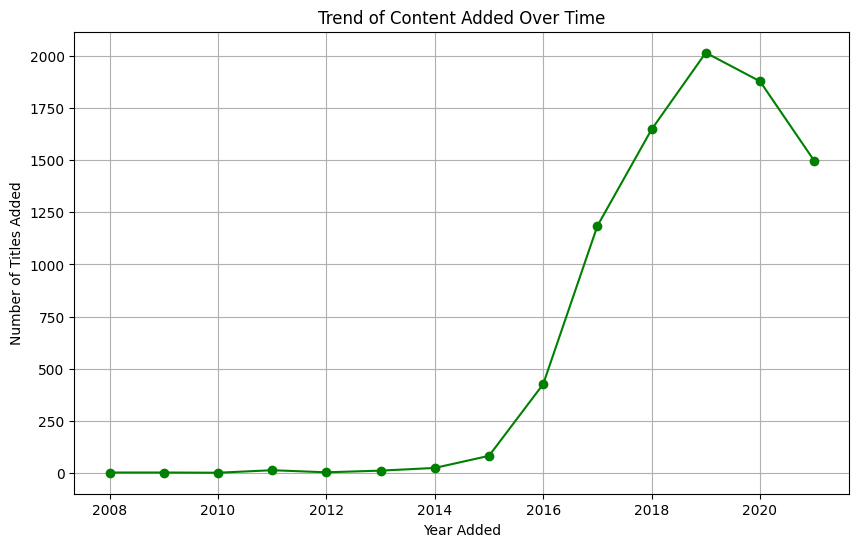

In [9]:
# Extract year from the 'date_added' column
data['year_added'] = data['date_added'].dt.year

# Count content added each year
content_by_year = data['year_added'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 6))
content_by_year.plot(kind='line', marker='o', color='green')
plt.title('Trend of Content Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid()
plt.show()


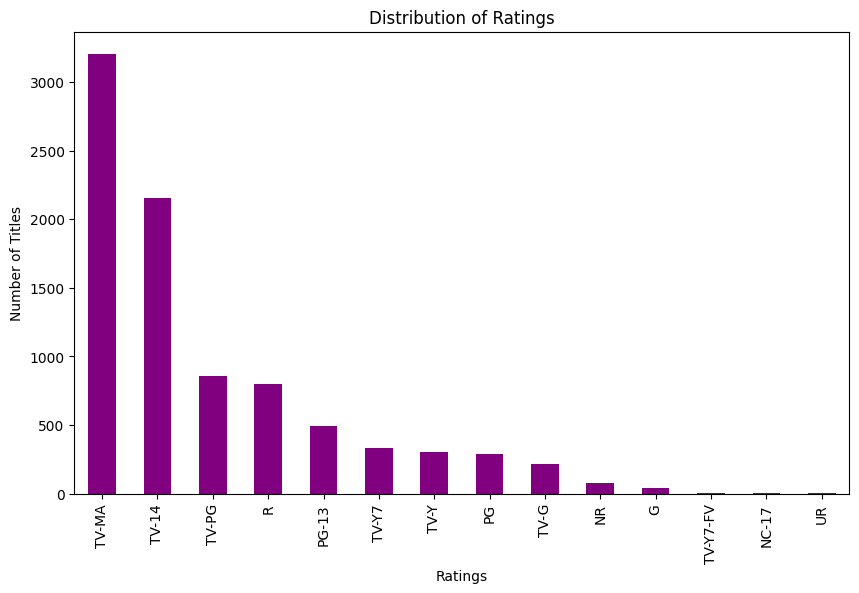

In [10]:
# Count ratings
rating_counts = data['rating'].value_counts()

# Plot the ratings
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Titles')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_6008\3403050594.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Count', y='Genre', palette='coolwarm')


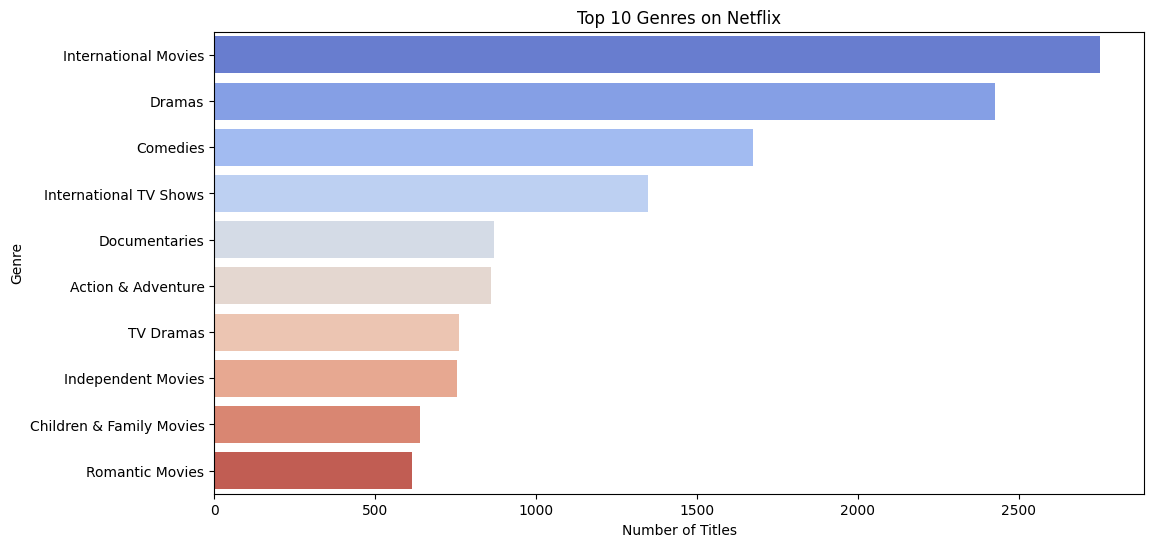

In [11]:
# Split genres in 'listed_in' and count each genre
from collections import Counter

# Flatten all genres into a list
all_genres = data['listed_in'].str.split(', ').explode()
genre_counts = Counter(all_genres).most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

# Plot the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_6008\3261965275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')


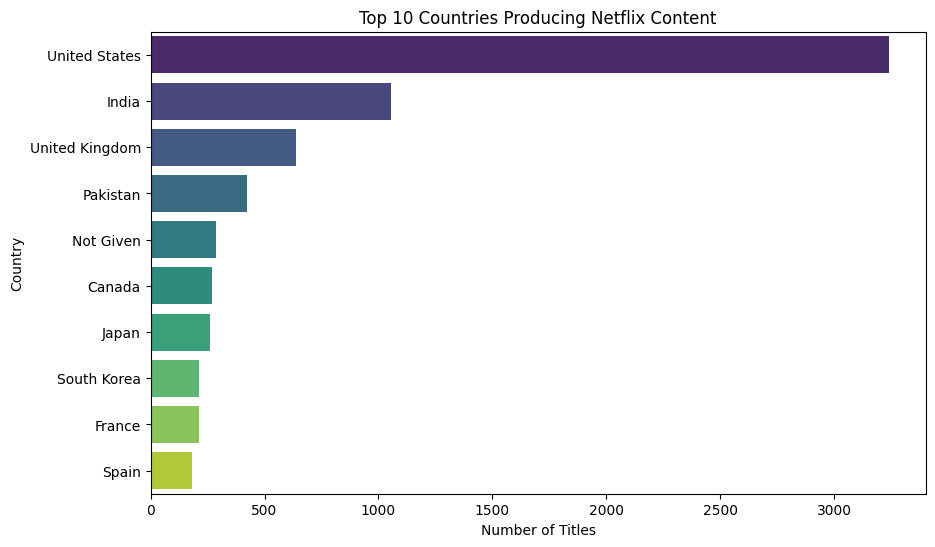

In [12]:
# Count content by country
country_counts = data['country'].value_counts().head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_6008\953593887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')


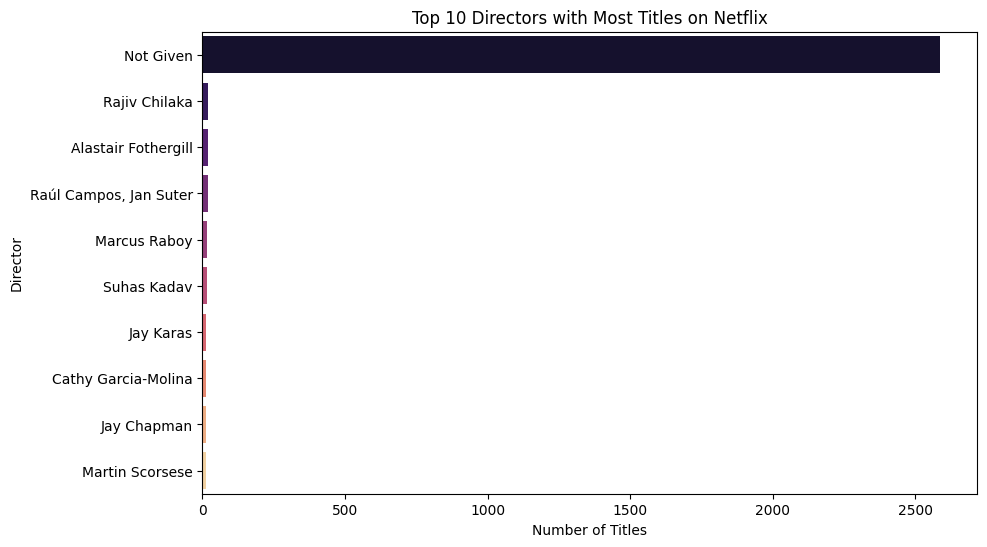

In [13]:
# Count titles by director
director_counts = data['director'].value_counts().head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


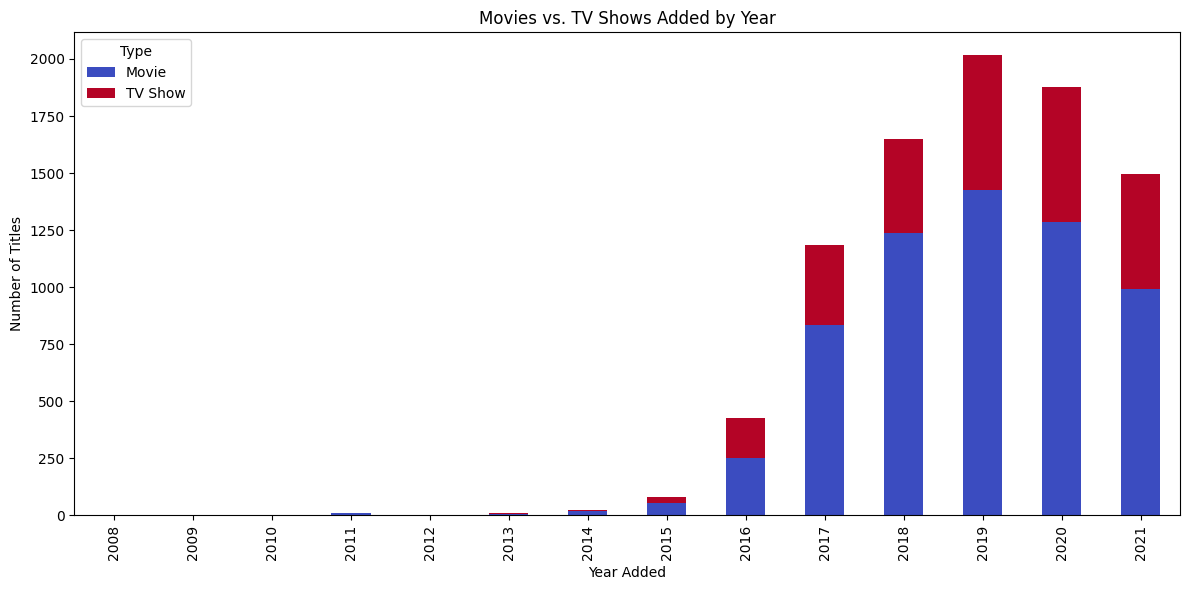

In [14]:
# Group data by year and type
type_by_year = data.groupby(['year_added', 'type']).size().unstack()

# Plot the results
type_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Movies vs. TV Shows Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


In [15]:
# Sort the dataset by duration for Movies
longest_movies = data[data['type'] == 'Movie'].nlargest(5, 'duration_value')

# Sort the dataset by duration for TV Shows
longest_shows = data[data['type'] == 'TV Show'].nlargest(5, 'duration_value')

print("Longest Movies:\n", longest_movies[['title', 'duration_value', 'duration_unit']])
print("\nLongest TV Shows:\n", longest_shows[['title', 'duration_value', 'duration_unit']])


Longest Movies:
                             title  duration_value duration_unit
7822   Black Mirror: Bandersnatch             312           min
151   Headspace: Unwind Your Mind             273           min
2020       The School of Mischief             253           min
2018               No Longer kids             237           min
2009           Lock Your Girls In             233           min

Longest TV Shows:
                        title  duration_value duration_unit
6697          Grey's Anatomy              17       Seasons
1971            Supernatural              15       Seasons
7987                    NCIS              15       Seasons
6884               Heartland              13       Seasons
7816  COMEDIANS of the world              13       Seasons


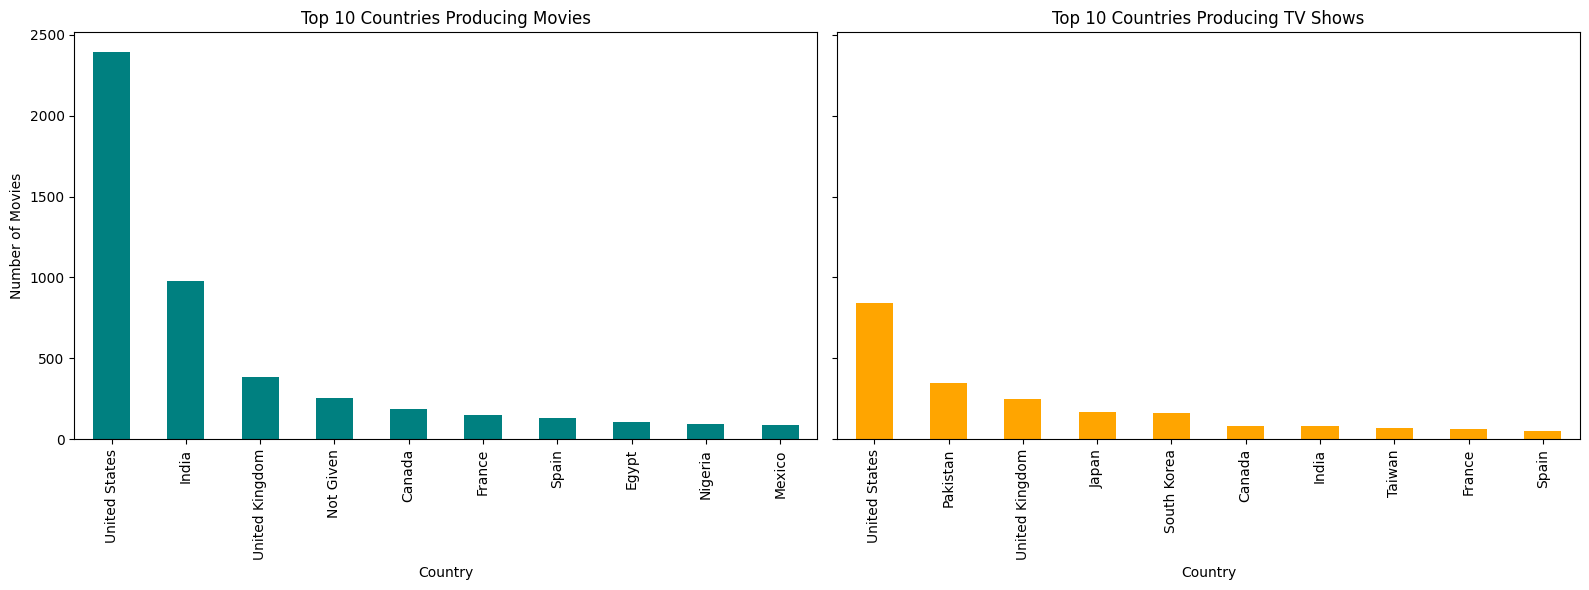

In [16]:
# Filter data by type and count by country
movies_by_country = data[data['type'] == 'Movie']['country'].value_counts().head(10)
tv_shows_by_country = data[data['type'] == 'TV Show']['country'].value_counts().head(10)

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

movies_by_country.plot(kind='bar', ax=axes[0], color='teal', title='Top 10 Countries Producing Movies')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Movies')

tv_shows_by_country.plot(kind='bar', ax=axes[1], color='orange', title='Top 10 Countries Producing TV Shows')
axes[1].set_xlabel('Country')

plt.tight_layout()
plt.show()



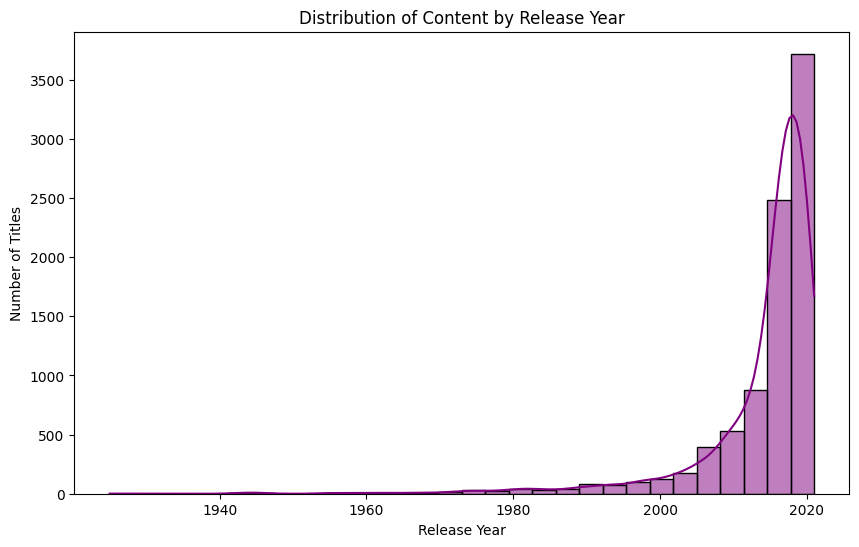

In [17]:
# Plot release year distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='release_year', bins=30, kde=True, color='purple')
plt.title('Distribution of Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


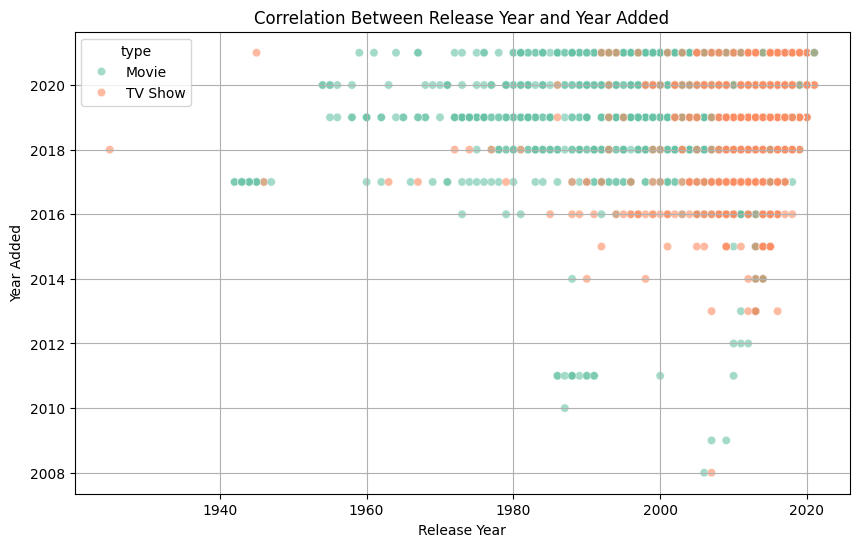

In [18]:
# Scatter plot between release year and year_added
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='release_year', y='year_added', hue='type', palette='Set2', alpha=0.6)
plt.title('Correlation Between Release Year and Year Added')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.grid()
plt.show()


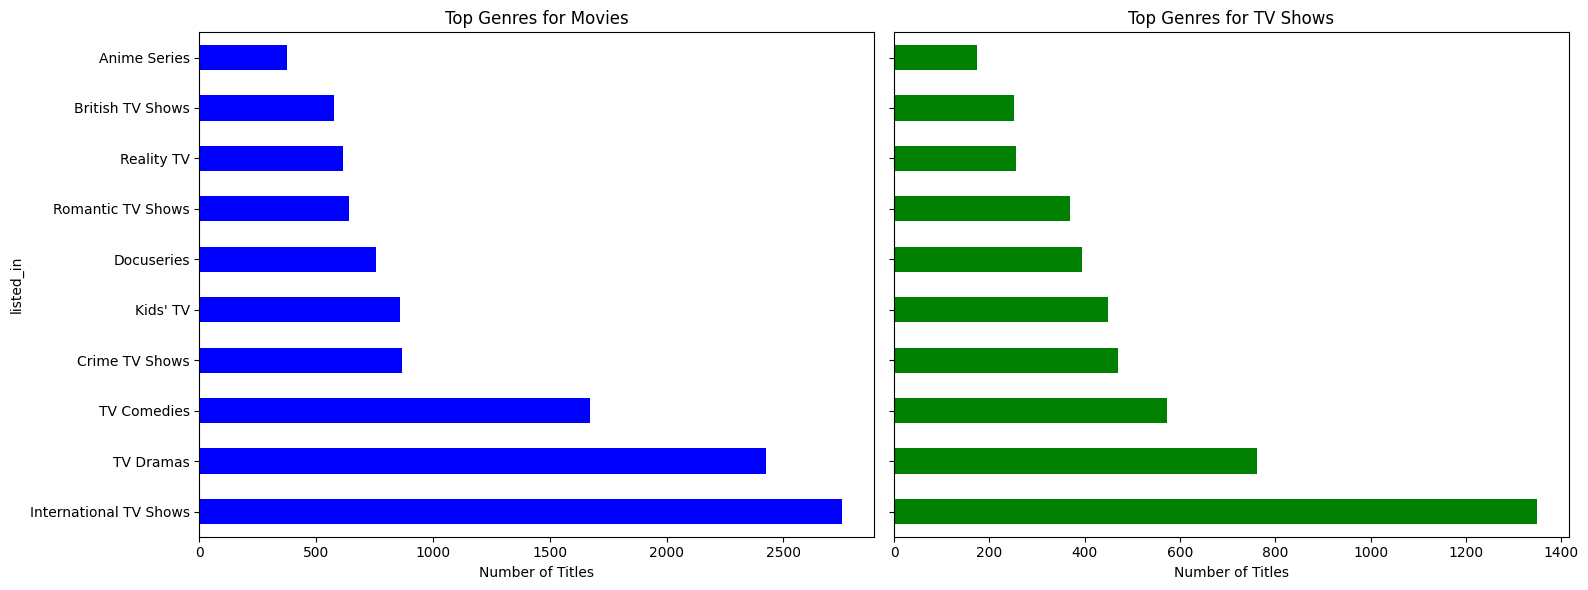

In [19]:
# Split genres for movies and TV shows
movie_genres = data[data['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts().head(10)
tv_genres = data[data['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts().head(10)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

movie_genres.plot(kind='barh', ax=axes[0], color='blue', title='Top Genres for Movies')
axes[0].set_xlabel('Number of Titles')

tv_genres.plot(kind='barh', ax=axes[1], color='green', title='Top Genres for TV Shows')
axes[1].set_xlabel('Number of Titles')

plt.tight_layout()
plt.show()


Content Distribution:
type
Movie      6126
TV Show    2664
Name: count, dtype: int64


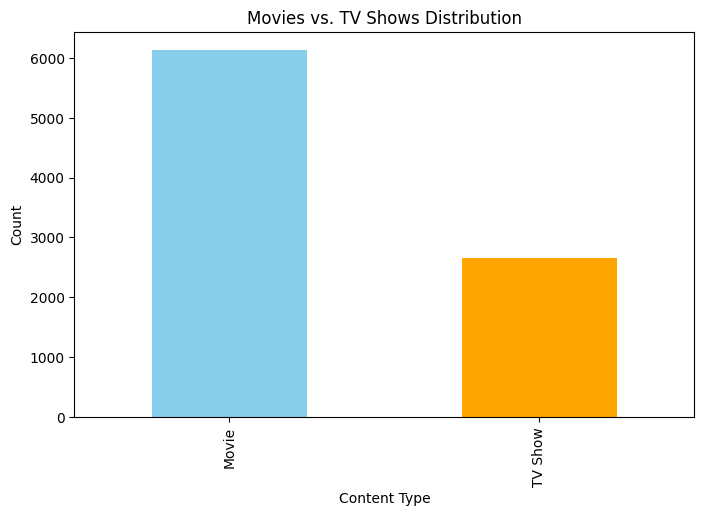

In [20]:
# Count the distribution of content types
content_distribution = data['type'].value_counts()

# Display insights
print("Content Distribution:")
print(content_distribution)

# Plot the results
import matplotlib.pyplot as plt
content_distribution.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 5))
plt.title('Movies vs. TV Shows Distribution')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


Top 10 Countries Producing Content:
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


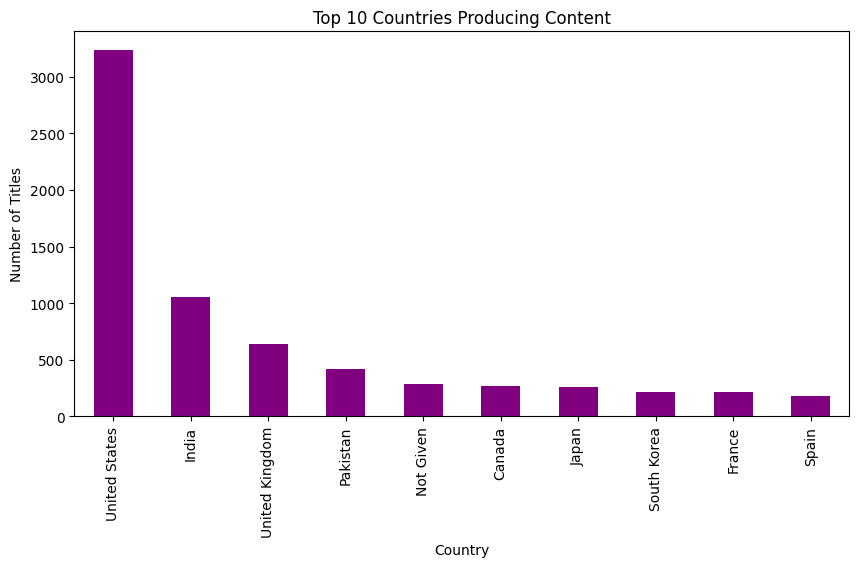

In [21]:
# Count the number of titles by country
top_countries = data['country'].value_counts().head(10)

# Display insights
print("Top 10 Countries Producing Content:")
print(top_countries)

# Plot the results
top_countries.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


Release Year Trends:
release_year
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Name: count, dtype: int64


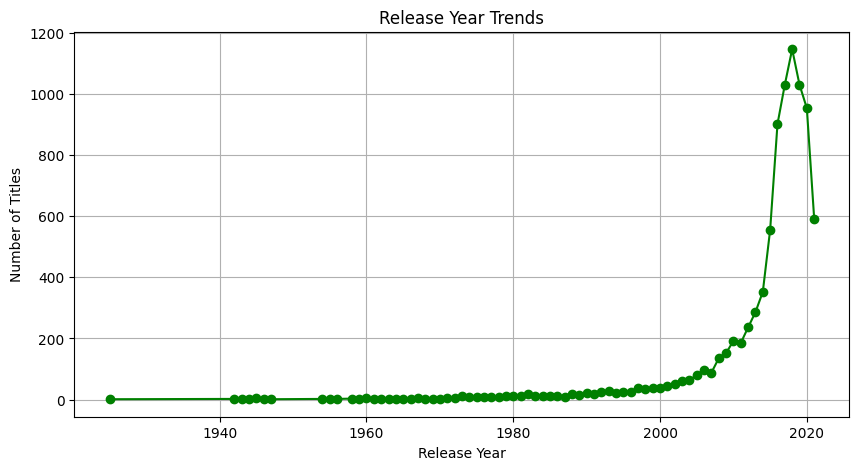

In [22]:
# Count content by release year
release_year_trends = data['release_year'].value_counts().sort_index()

# Display insights
print("Release Year Trends:")
print(release_year_trends.tail())

# Plot the results
release_year_trends.plot(kind='line', figsize=(10, 5), color='green', marker='o')
plt.title('Release Year Trends')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()


Top 10 Genres on Netflix:
                      Genre  Count
0      International Movies   2752
1                    Dramas   2426
2                  Comedies   1674
3    International TV Shows   1349
4             Documentaries    869
5        Action & Adventure    859
6                 TV Dramas    762
7        Independent Movies    756
8  Children & Family Movies    641
9           Romantic Movies    616


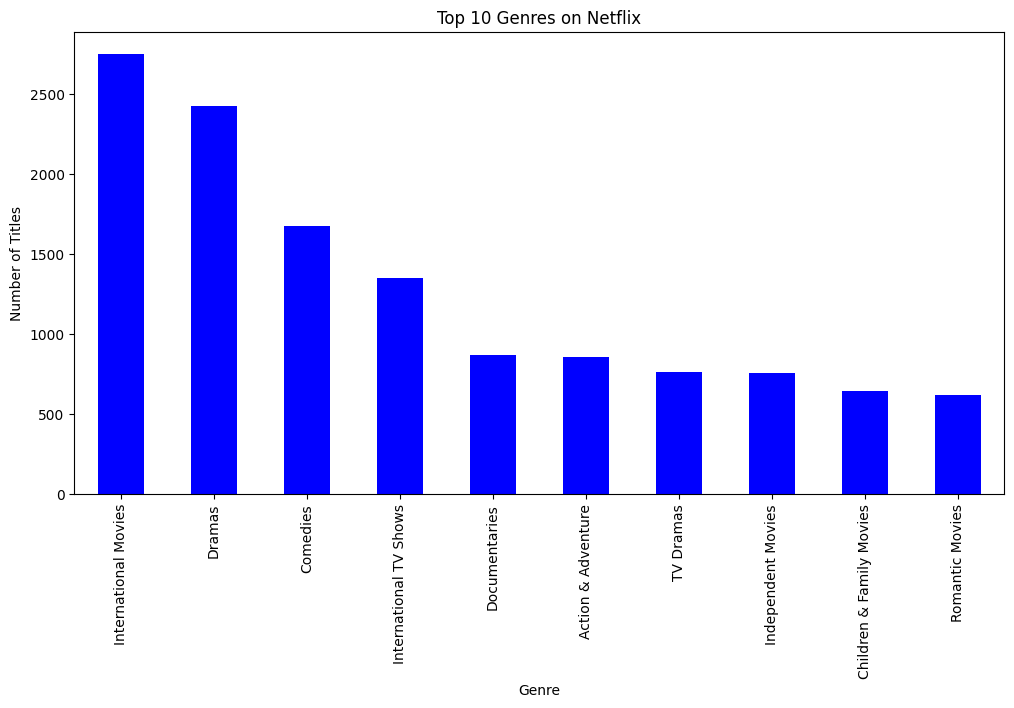

In [23]:
# Split and count genres
from collections import Counter

all_genres = data['listed_in'].str.split(', ').explode()
genre_counts = Counter(all_genres)

# Display top 10 genres
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
print("Top 10 Genres on Netflix:")
print(top_genres)

# Plot the results
top_genres.plot(kind='bar', x='Genre', y='Count', figsize=(12, 6), color='blue', legend=False)
plt.title('Top 10 Genres on Netflix')
plt.ylabel('Number of Titles')
plt.show()


In [24]:
# Average duration for Movies
avg_movie_duration = data[data['type'] == 'Movie']['duration_value'].mean()

# Average number of seasons for TV Shows
avg_tv_seasons = data[data['type'] == 'TV Show']['duration_value'].mean()

print(f"The average movie duration is {avg_movie_duration:.2f} minutes.")
print(f"The average number of seasons for TV shows is {avg_tv_seasons:.2f}.")


The average movie duration is 99.58 minutes.
The average number of seasons for TV shows is 1.75.


In [25]:
# Most common content type
most_common_type = data['type'].value_counts().idxmax()

# Country producing the most content
top_country = data['country'].value_counts().idxmax()

# Most common genre
most_common_genre = data['listed_in'].str.split(', ').explode().value_counts().idxmax()

# Average duration of Movies
avg_movie_duration = data[data['type'] == 'Movie']['duration_value'].mean()

# Year with the most additions
most_additions_year = data['year_added'].value_counts().idxmax()

print(f"1. The most common content type is {most_common_type}.")
print(f"2. {top_country} is the country producing the most content.")
print(f"3. The most common genre is {most_common_genre}.")
print(f"4. The average movie duration is {avg_movie_duration:.2f} minutes.")
print(f"5. The year with the most additions to Netflix is {most_additions_year}.")


1. The most common content type is Movie.
2. United States is the country producing the most content.
3. The most common genre is International Movies.
4. The average movie duration is 99.58 minutes.
5. The year with the most additions to Netflix is 2019.
